In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))  

In [2]:
import cirq
from qudit_cirq.circuit_builder import create_circuit
from qudit_cirq.utils import format_out, printVector, tensor_product
from qudit_cirq.qudit import quditXGate, quditZGate, quditHGate, quditCNOTGate, state_vector, qudit_measure

In [3]:
d =4 # dimensions

In [4]:
qudit0 = cirq.LineQid(0, dimension=d)
qudit1 = cirq.LineQid(1, dimension=d)

qudit_x = quditXGate(d)
qudit_z = quditZGate(d)
qudit_h = quditHGate(d)
qudit_cnot = quditCNOTGate(d)

In [5]:
circuit = cirq.Circuit()

circuit.append(qudit_h.on(qudit0))
circuit.append(qudit_cnot.on(qudit0, qudit1))
circuit.append(qudit_x.on(qudit1))
circuit.append(qudit_z.on(qudit0))
circuit.append(qudit_measure(qudit0, key='m0'))
circuit.append(qudit_measure(qudit1, key='m1'))

print("Circuit:")
print(circuit)

Circuit:
0 (d=4): ───H(d=4)───C───Z(d=4)───M('m0')───
                     │
1 (d=4): ────────────X───X(d=4)───M('m1')───


In [35]:
circuit, qudits, qudit_order = create_circuit( 5,
    (quditHGate, "qudit1"),                      
    (quditXGate, "qudit2"),                      
    (quditCNOTGate, ["qudit1", "qudit2"]),
    (qudit_measure, "qudit1"),
    (qudit_measure, "qudit2")      
)

print("Circuit:")
print(circuit.to_text_diagram(qubit_order=qudit_order))

Circuit:
qudit1 (d=5): ───H(d=5)───C───M('m_qudit1')───
                          │
qudit2 (d=5): ───X(d=5)───X───M('m_qudit2')───


In [36]:
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=7)

In [37]:
m0_results = result.measurements['m_qudit1'].flatten()
m1_results = result.measurements['m_qudit2'].flatten()

print("m0 results:", m0_results)
print("m1 results:", m1_results)

m0 results: [3 2 4 0 3 2 4]
m1 results: [3 4 2 1 3 4 2]


### Visulazation

In [38]:
import matplotlib.pyplot as plt

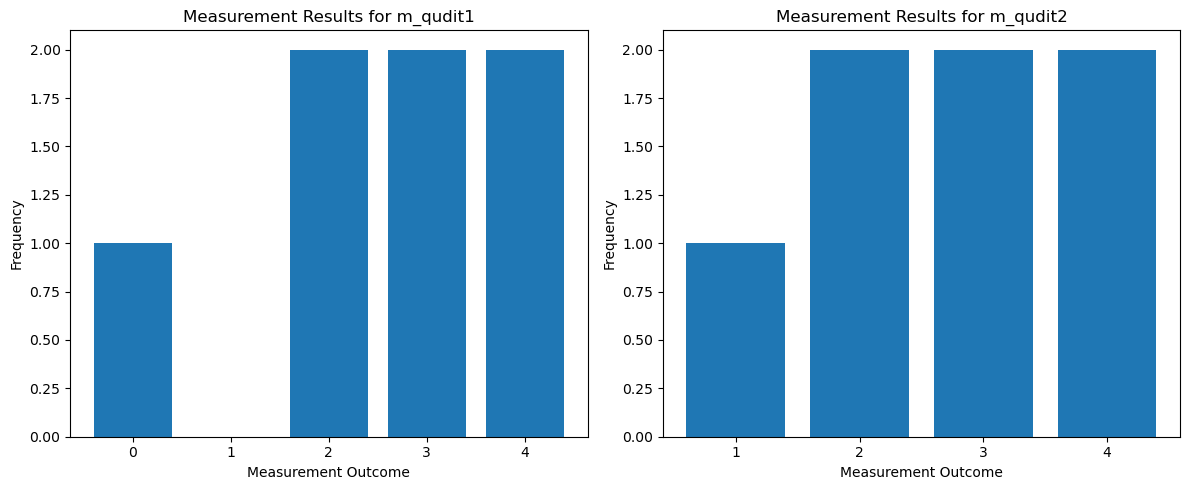

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(m0_results, bins=range(min(m0_results), max(m0_results) + 2), align='left', rwidth=0.8)
axs[0].set_title("Measurement Results for m_qudit1")
axs[0].set_xlabel("Measurement Outcome")
axs[0].set_ylabel("Frequency")
axs[0].set_xticks(range(min(m0_results), max(m0_results) + 1))

axs[1].hist(m1_results, bins=range(min(m1_results), max(m1_results) + 2), align='left', rwidth=0.8)
axs[1].set_title("Measurement Results for m_qudit2")
axs[1].set_xlabel("Measurement Outcome")
axs[1].set_ylabel("Frequency")
axs[1].set_xticks(range(min(m1_results), max(m1_results) + 1))

plt.tight_layout()
plt.show()